이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

이 노트북은 텐서플로 2.8 버전에서 테스트했습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2022-04-26 06:01:04.258374: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.6309 - accuracy: 0.8121 - val_loss: 0.2789 - val_accuracy: 0.9140
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2530 - accuracy: 0.9208 - val_loss: 0.2704 - val_accuracy: 0.9162
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1655 - accuracy: 0.9487 - val_loss: 0.1654 - val_accuracy: 0.9500
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1182 - accuracy: 0.9633 - val_loss: 0.1321 - val_accuracy: 0.9632
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0865 - accuracy: 0.9725 - val_loss: 0.1435 - val_accuracy: 0.9585
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.1250 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.1319 - val_accuracy: 0.9654

**검증 정확도 비교 그래프 그리기**

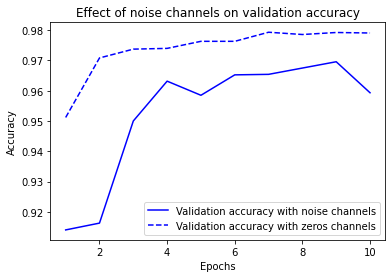

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 2.3173 - accuracy: 0.1044 - val_loss: 2.3068 - val_accuracy: 0.1095
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2995 - accuracy: 0.1183 - val_loss: 2.3133 - val_accuracy: 0.1042
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2899 - accuracy: 0.1320 - val_loss: 2.3219 - val_accuracy: 0.1021
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2753 - accuracy: 0.1427 - val_loss: 2.3322 - val_accuracy: 0.1016
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2565 - accuracy: 0.1551 - val_loss: 2.3369 - val_accuracy: 0.1041
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2345 - accuracy: 0.1726 - val_loss: 2.3527 - val_accuracy: 0.1017
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2081 - accuracy: 0.1897 - val_loss: 2.3686 - val_accuracy: 0.1051

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 864.5463 - accuracy: 0.4204 - val_loss: 2.0885 - val_accuracy: 0.2504
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 3.9584 - accuracy: 0.2538 - val_loss: 2.2037 - val_accuracy: 0.2064
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.8090 - accuracy: 0.2112 - val_loss: 2.9223 - val_accuracy: 0.2238
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5907 - accuracy: 0.2327 - val_loss: 2.0428 - val_accuracy: 0.2383
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6024 - accuracy: 0.2487 - val_loss: 2.5173 - val_accuracy: 0.2293
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7019 - accuracy: 0.2658 - val_loss: 3.7475 - val_accuracy: 0.2871
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6650 - accuracy: 0.2824 - val_loss: 2.1500 - val_accuracy: 0.3058
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3582 - accuracy: 0.9111 - val_loss: 0.1782 - val_accuracy: 0.9544
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1400 - accuracy: 0.9641 - val_loss: 0.1446 - val_accuracy: 0.9658
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1143 - accuracy: 0.9729 - val_loss: 0.1970 - val_accuracy: 0.9615
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1051 - accuracy: 0.9775 - val_loss: 0.1987 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0913 - accuracy: 0.9816 - val_loss: 0.2091 - val_accuracy: 0.9691
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0809 - accuracy: 0.9840 - val_loss: 0.2684 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0792 - accuracy: 0.9853 - val_loss: 0.2632 - val_accuracy: 0.9732
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.8317 - val_loss: 0.3630 - val_accuracy: 0.8993
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9031 - val_loss: 0.3095 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.9122 - val_loss: 0.2916 - val_accuracy: 0.9196
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.9173 - val_loss: 0.2851 - val_accuracy: 0.9176
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9197 - val_loss: 0.2765 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9212 - val_loss: 0.2720 - val_accuracy: 0.9267
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2781 - accuracy: 0.9227 - val_loss: 0.2708 - val_accuracy: 0.9262
Epoch 

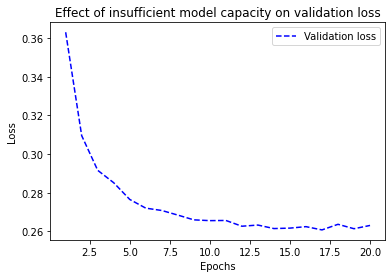

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3548 - accuracy: 0.8989 - val_loss: 0.1857 - val_accuracy: 0.9485
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1611 - accuracy: 0.9517 - val_loss: 0.1329 - val_accuracy: 0.9606
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9664 - val_loss: 0.1121 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9735 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.1022 - val_accuracy: 0.9714
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0979 - val_accuracy: 0.9712
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.1046 - val_accuracy: 0.9729
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-04-26 06:08:06.806259: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 53ms/step - loss: 0.5583 - accuracy: 0.7349 - val_loss: 0.4152 - val_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3334 - accuracy: 0.8959 - val_loss: 0.3370 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2316 - accuracy: 0.9288 - val_loss: 0.3156 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1788 - accuracy: 0.9432 - val_loss: 0.2803 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1438 - accuracy: 0.9553 - val_loss: 0.2895 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1166 - accuracy: 0.9645 - val_loss: 0.3241 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0966 - accuracy: 0.9708 - val_loss: 0.3186 - val_accuracy: 0.8819
Epoch 8/20
30/30 [======

**작은 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-04-26 06:08:23.002536: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 50ms/step - loss: 0.6102 - accuracy: 0.7357 - val_loss: 0.5276 - val_accuracy: 0.8339
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4571 - accuracy: 0.8817 - val_loss: 0.4236 - val_accuracy: 0.8588
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3550 - accuracy: 0.9025 - val_loss: 0.3575 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2875 - accuracy: 0.9159 - val_loss: 0.3240 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2425 - accuracy: 0.9271 - val_loss: 0.2934 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2086 - accuracy: 0.9363 - val_loss: 0.2839 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1825 - accuracy: 0.9441 - val_loss: 0.2740 - val_accuracy: 0.8930
Epoch 8/20
30/30 [======

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-04-26 06:08:39.214137: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 6s 150ms/step - loss: 0.5602 - accuracy: 0.7523 - val_loss: 0.3069 - val_accuracy: 0.8823
Epoch 2/20
30/30 [==============================] - 3s 105ms/step - loss: 0.2433 - accuracy: 0.9059 - val_loss: 0.2695 - val_accuracy: 0.8935
Epoch 3/20
30/30 [==============================] - 3s 102ms/step - loss: 0.1620 - accuracy: 0.9411 - val_loss: 0.3178 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 3s 107ms/step - loss: 0.0903 - accuracy: 0.9739 - val_loss: 0.3846 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 3s 103ms/step - loss: 0.0974 - accuracy: 0.9755 - val_loss: 0.3148 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 3s 102ms/step - loss: 0.0067 - accuracy: 0.9997 - val_loss: 0.5090 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 3s 118ms/step - loss: 8.1295e-04 - accuracy: 0.9999 - val_loss: 0.6112 - val_accuracy: 0.8839
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-04-26 06:09:45.646248: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 48ms/step - loss: 0.5829 - accuracy: 0.7870 - val_loss: 0.4552 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3873 - accuracy: 0.8965 - val_loss: 0.4027 - val_accuracy: 0.8699
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3194 - accuracy: 0.9145 - val_loss: 0.3937 - val_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2871 - accuracy: 0.9275 - val_loss: 0.3595 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2704 - accuracy: 0.9335 - val_loss: 0.3574 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2545 - accuracy: 0.9392 - val_loss: 0.3664 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2435 - accuracy: 0.9455 - val_loss: 0.3734 - val_accuracy: 0.8816
Epoch 8/20
30/30 [======

**케라스에서 사용할 수 있는 가중치 규제**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-04-26 06:10:00.536333: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 47ms/step - loss: 0.6451 - accuracy: 0.6151 - val_loss: 0.5485 - val_accuracy: 0.7754
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5379 - accuracy: 0.7553 - val_loss: 0.4662 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4668 - accuracy: 0.8147 - val_loss: 0.3946 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4075 - accuracy: 0.8542 - val_loss: 0.3587 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3580 - accuracy: 0.8818 - val_loss: 0.3193 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3185 - accuracy: 0.9031 - val_loss: 0.3038 - val_accuracy: 0.8921
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2771 - accuracy: 0.9161 - val_loss: 0.2920 - val_accuracy: 0.8887
Epoch 8/20
30/30 [======

## 요약